<a href="https://colab.research.google.com/github/MRP-DucAnh/AgeInMinutes/blob/master/Finpros_Entry_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finpros test - Bài tập dự đoán biến động giá chứng khoán



*   N là  là một biến thời gian (phút) có thể thay đổi
*   Biến động giá cổ phiếu được tính bằng công thức: Giá đóng cổ phiếu tại thời điểm a trừ đi Giá đóng cổ phiếu của N phút trước đó.




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Xử lý dữ liệu


In [ ]:
import pandas as pd
# Đường dẫn đến tệp CSV trên Google Drive
file_path = '/content/gdrive/MyDrive/Finpros_Test/MSN.csv'

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv(file_path)

# Hiển thị dữ liệu đầu tiên
print(data.head())

  Ticker        Date/Time  Open  High   Low  Close  Volume  Open Interest
0    MSN  12/25/2017 9:15  73.1  73.1  73.1   73.1    4210              0
1    MSN  12/25/2017 9:16  73.0  73.0  73.0   73.0    5000              0
2    MSN  12/25/2017 9:18  73.5  73.5  73.5   73.5     210              0
3    MSN  12/25/2017 9:20  73.2  73.5  73.1   73.1    2050              0
4    MSN  12/25/2017 9:21  73.0  73.0  73.0   73.0    1380              0


In [ ]:
# Chuyển cột 'Date/Time' sang định dạng datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Sắp xếp lại dữ liệu theo thời gian
data = data.sort_values(by='Date/Time')

# Hàm tính biến động giá cổ phiếu trong N phút
def price_change_in_N_minutes(data, N):
    # Tạo một cột mới để lưu trữ giá đóng cửa của N phút trước đó
    data['Previous Close'] = data['Close'].shift(N)

    # Tính toán biến động giá
    data['Price Change'] = data['Close'] - data['Previous Close']

    return data

# Thiết lập giá trị của N
N = 5

# Tính toán biến động giá trong N phút
data_with_price_change = price_change_in_N_minutes(data, N)

# Hiển thị kết quả
print(data_with_price_change[['Date/Time', 'Close', 'Previous Close', 'Price Change']])


                 Date/Time  Close  Previous Close  Price Change
0      2017-12-25 09:15:00   73.1             NaN           NaN
1      2017-12-25 09:16:00   73.0             NaN           NaN
2      2017-12-25 09:18:00   73.5             NaN           NaN
3      2017-12-25 09:20:00   73.1             NaN           NaN
4      2017-12-25 09:21:00   73.0             NaN           NaN
...                    ...    ...             ...           ...
135349 2020-12-22 14:23:00   82.8            82.7           0.1
135350 2020-12-22 14:24:00   82.8            82.9          -0.1
135351 2020-12-22 14:25:00   82.8            82.7           0.1
135352 2020-12-22 14:27:00   82.8            82.8           0.0
135353 2020-12-22 14:46:00   82.8            82.8           0.0

[135354 rows x 4 columns]


In [ ]:
print(data_with_price_change[['Date/Time', 'Close', 'Previous Close', 'Price Change']].tail(20))

                 Date/Time  Close  Previous Close  Price Change
135334 2020-12-22 14:08:00   82.7            82.8          -0.1
135335 2020-12-22 14:09:00   82.8            82.8           0.0
135336 2020-12-22 14:10:00   82.7            82.7           0.0
135337 2020-12-22 14:11:00   82.7            82.7           0.0
135338 2020-12-22 14:12:00   82.7            82.7           0.0
135339 2020-12-22 14:13:00   82.7            82.7           0.0
135340 2020-12-22 14:14:00   82.7            82.8          -0.1
135341 2020-12-22 14:15:00   82.7            82.7           0.0
135342 2020-12-22 14:16:00   82.7            82.7           0.0
135343 2020-12-22 14:17:00   82.7            82.7           0.0
135344 2020-12-22 14:18:00   82.7            82.7           0.0
135345 2020-12-22 14:19:00   82.9            82.7           0.2
135346 2020-12-22 14:20:00   82.7            82.7           0.0
135347 2020-12-22 14:21:00   82.8            82.7           0.1
135348 2020-12-22 14:22:00   82.8       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loại bỏ các dòng có giá trị null (nếu có)
data_with_price_change.dropna(inplace=True)

# Chia dữ liệu thành features (X) và target variable (y)
X = data_with_price_change[['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']]
y = data_with_price_change['Price Change']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.10092684541062555


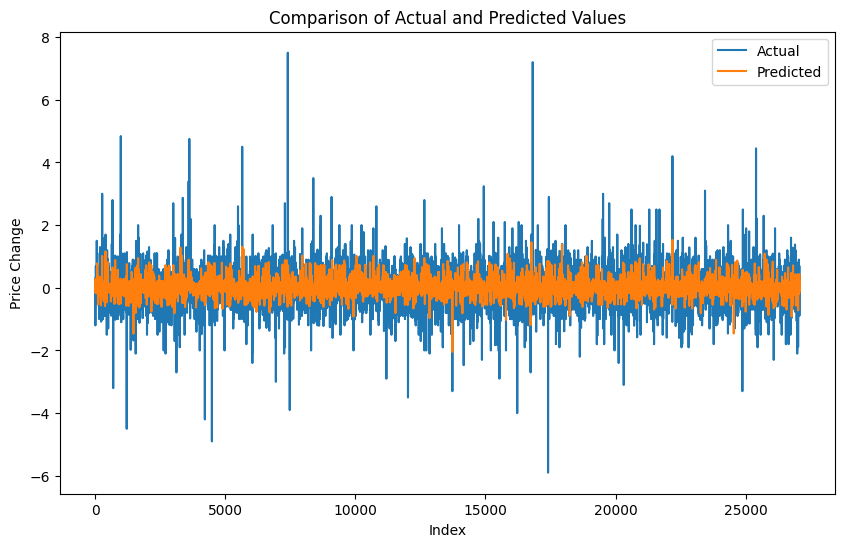

In [ ]:
import matplotlib.pyplot as plt

# Plot a comparison chart between actual values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price Change')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

Mean Squared Error (Gradient Boosting): 0.11462681973765472


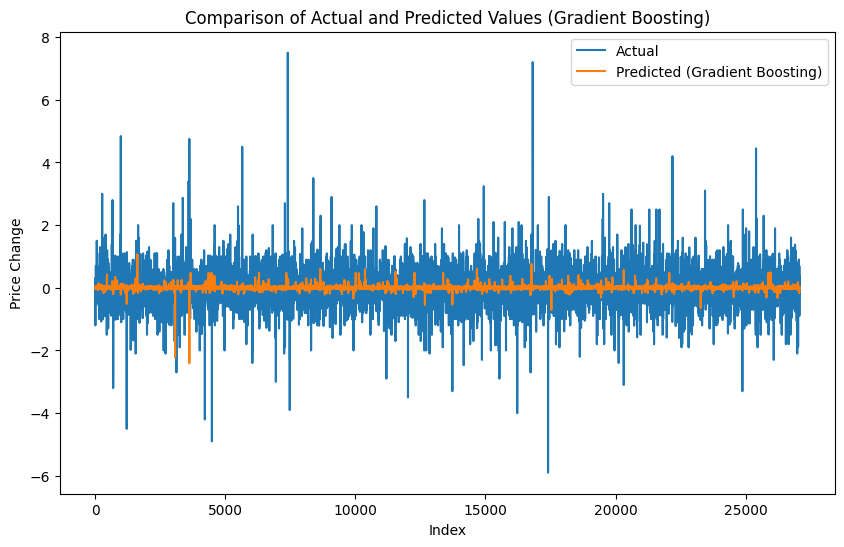

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor()


gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)


mse_gb = mean_squared_error(y_test, y_pred_gb)
print('Mean Squared Error (Gradient Boosting):', mse_gb)

# Plot a comparison chart
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_gb, label='Predicted (Gradient Boosting)')
plt.xlabel('Index')
plt.ylabel('Price Change')
plt.title('Comparison of Actual and Predicted Values (Gradient Boosting)')
plt.legend()
plt.show()

Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error (Random Forest):', mse_rf)


Mean Squared Error (Random Forest): 0.11884740182694772


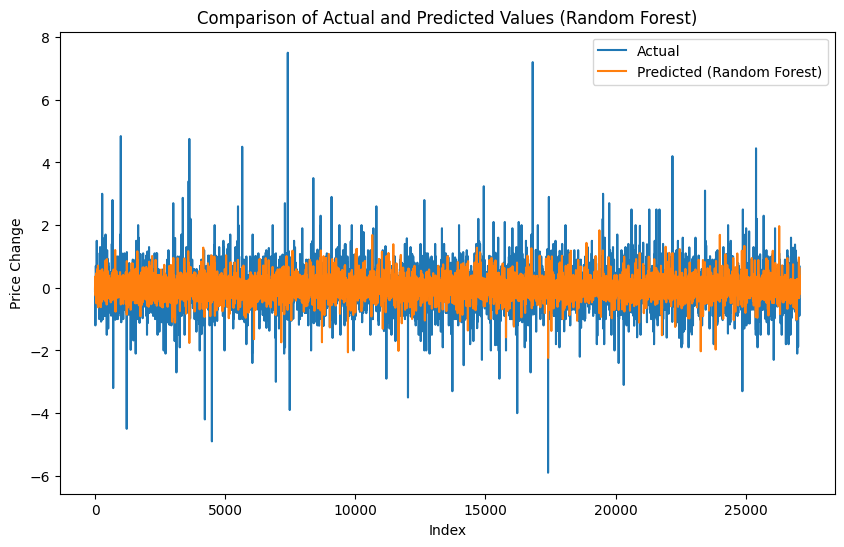

In [ ]:
# Plot a comparison chart
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted (Random Forest)')
plt.xlabel('Index')
plt.ylabel('Price Change')
plt.title('Comparison of Actual and Predicted Values (Random Forest)')
plt.legend()
plt.show()

SVM model

In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Machine model
svm_model = SVR()

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print('Mean Squared Error (SVM):', mse_svm)

Mean Squared Error (SVM): 0.11514640702798866


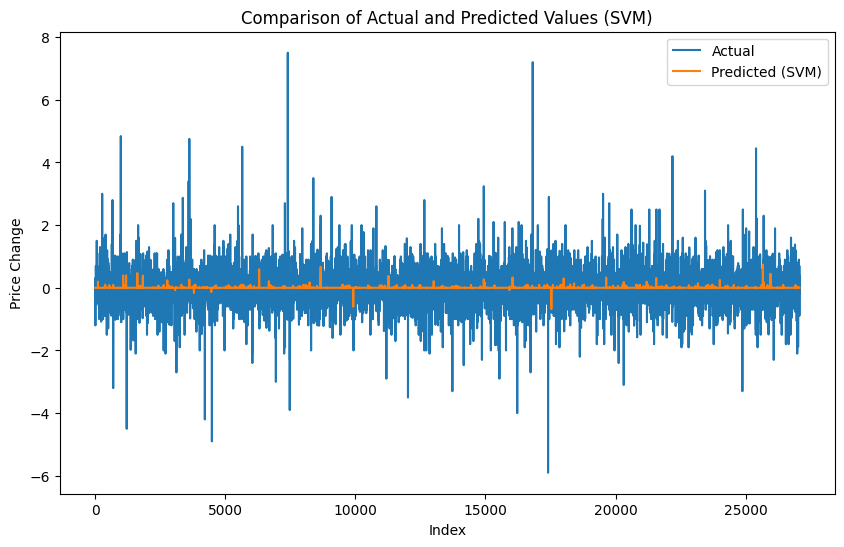

In [ ]:
# Plot a comparison chart between actual values and predicted values (SVM)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_svm, label='Predicted (SVM)')
plt.xlabel('Index')
plt.ylabel('Price Change')
plt.title('Comparison of Actual and Predicted Values (SVM)')
plt.legend()
plt.show()

LSTM Model

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Convert data to supervised learning problem
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Create dataset for training and testing
look_back = 5
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Epoch 1/10
94739/94739 - 192s - loss: 1.0980e-04 - 192s/epoch - 2ms/step
Epoch 2/10
94739/94739 - 185s - loss: 1.9223e-05 - 185s/epoch - 2ms/step
Epoch 3/10
94739/94739 - 191s - loss: 1.6960e-05 - 191s/epoch - 2ms/step
Epoch 4/10
94739/94739 - 190s - loss: 1.5663e-05 - 190s/epoch - 2ms/step
Epoch 5/10
94739/94739 - 187s - loss: 1.4756e-05 - 187s/epoch - 2ms/step
Epoch 6/10
94739/94739 - 190s - loss: 1.4296e-05 - 190s/epoch - 2ms/step
Epoch 7/10
94739/94739 - 186s - loss: 1.3722e-05 - 186s/epoch - 2ms/step
Epoch 8/10
94739/94739 - 184s - loss: 1.3449e-05 - 184s/epoch - 2ms/step
Epoch 9/10
94739/94739 - 184s - loss: 1.3255e-05 - 184s/epoch - 2ms/step
Epoch 10/10
94739/94739 - 184s - loss: 1.2830e-05 - 184s/epoch - 2ms/step
1269/1269 [==============================] - 2s 2ms/step
Train Score: 0.20 RMSE
Test Score: 0.22 RMSE


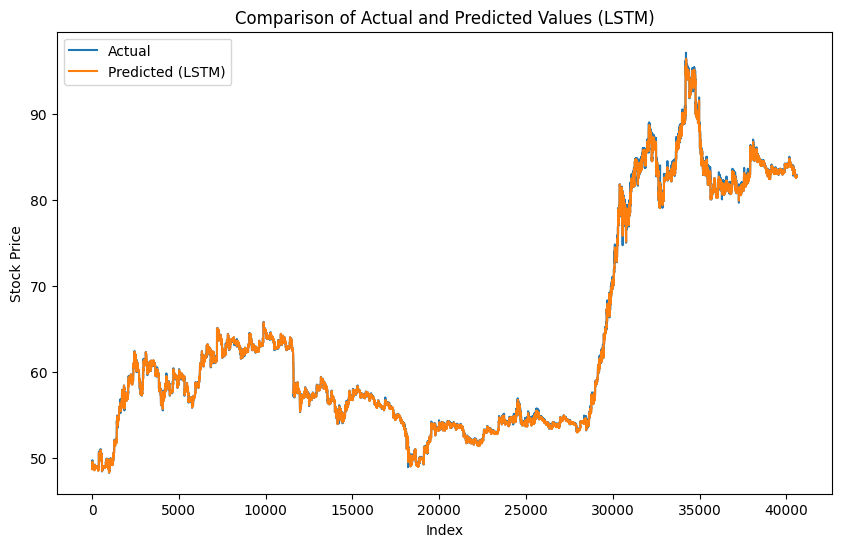

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[0], label='Actual')
plt.plot(test_predict, label='Predicted (LSTM)')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Comparison of Actual and Predicted Values (LSTM)')
plt.legend()
plt.show()

# Try FPT.csv


In [ ]:
# Đường dẫn đến tệp CSV trên Google Drive
file_path = '/content/gdrive/MyDrive/Finpros_Test/FPT.csv'

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv(file_path)

# Hiển thị dữ liệu đầu tiên
print(data.head())

  Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0


In [ ]:
import plotly.graph_objects as go


# Chuyển đổi cột thời gian thành định dạng datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
# Tạo biểu đồ nến
fig = go.Figure(data=go.Candlestick(x=data['Date/Time'],
                                   open=data['Open'],
                                   high=data['High'],
                                   low=data['Low'],
                                   close=data['Close'],
                                   increasing=dict(line=dict(color='green')),
                                   decreasing=dict(line=dict(color='red'))))

# Cập nhật thông tin về layout
fig.update_layout(title='Biểu đồ nến',
                  xaxis_title='Thời gian',
                  yaxis_title='Giá',
                  xaxis_rangeslider_visible=False)

# Hiển thị biểu đồ
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Tiền xử lý dữ liệu nếu cần

# Chọn số phút hoặc giờ hoặc ngày sau cần dự đoán
N_minutes = 15  # Đổi thành số phút bạn muốn dự đoán

# Tạo cột giá cổ phiếu N phút sau
data['Future Price'] = data['Close'].shift(-N_minutes)

# Loại bỏ hàng cuối cùng chứa giá cổ phiếu sau N phút là NaN
data.dropna(inplace=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[['Open', 'High', 'Low', 'Volume']]  # Các đặc trưng
y = data['Future Price']  # Biến mục tiêu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)

RMSE: 0.21122382119196648
R-squared: 0.9988901732932081


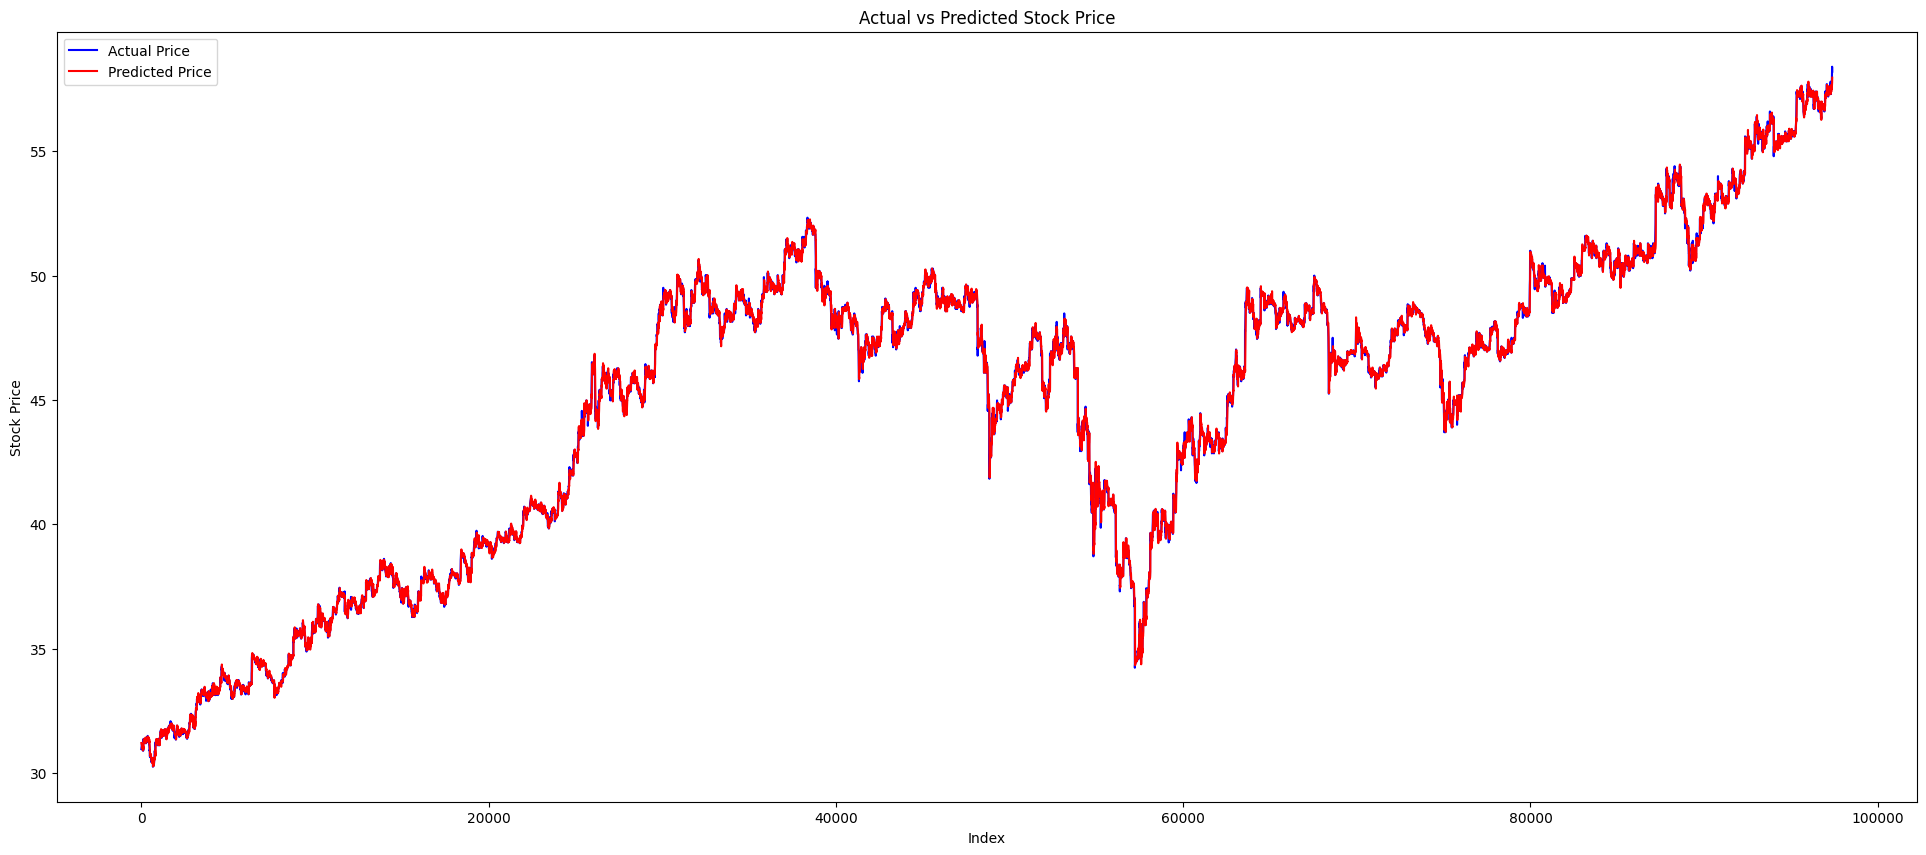

In [ ]:
import matplotlib.pyplot as plt

# Sắp xếp lại các giá trị theo thứ tự thời gian
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()

# Vẽ biểu đồ giá cổ phiếu thực tế và dự đoán
plt.figure(figsize=(24, 10))
plt.plot(y_test_sorted.index, y_test_sorted.values, label='Actual Price', color='blue')
plt.plot(y_test_sorted.index, y_pred_sorted.values, label='Predicted Price', color='red')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()

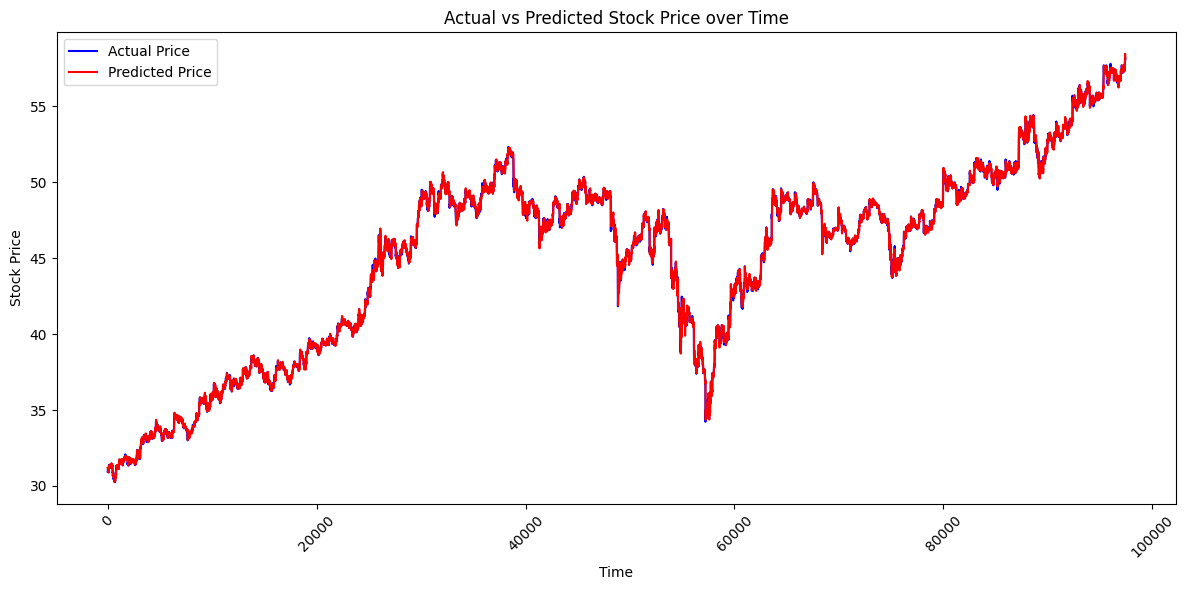

In [ ]:
# Trích xuất thông tin về thời gian từ tập kiểm tra
time_test = data.index[X_test.index]

# Tạo DataFrame mới chứa thông tin về thời gian và giá cổ phiếu dự đoán và thực tế
compare_df = pd.DataFrame({'Time': time_test, 'Actual Price': y_test.values, 'Predicted Price': y_pred})

# Sắp xếp lại DataFrame theo thứ tự thời gian
compare_df = compare_df.sort_values(by='Time')

# Vẽ biểu đồ so sánh dự đoán và thực tế theo thời gian (tháng/năm)
plt.figure(figsize=(12, 6))
plt.plot(compare_df['Time'], compare_df['Actual Price'], label='Actual Price', color='blue')
plt.plot(compare_df['Time'], compare_df['Predicted Price'], label='Predicted Price', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

LSTM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Đường dẫn đến tệp CSV trên Google Drive
file_path = '/content/gdrive/MyDrive/Finpros_Test/FPT.csv'

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv(file_path)
# Chọn cột giá cổ phiếu làm biến mục tiêu
data = data[['Close']]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Tạo dữ liệu đầu vào và đầu ra cho mô hình
look_back = 60  # Số lượng điểm dữ liệu quan sát trước đó để dự đoán điểm dữ liệu hiện tại
X, y = [], []
for i in range(len(data) - look_back):
    X.append(scaled_data[i:i+look_back, 0])
    y.append(scaled_data[i+look_back, 0])
X, y = np.array(X), np.array(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape dữ liệu để phù hợp với mạng LSTM (số lượng mẫu, số lượng bước thời gian, số lượng đặc trưng)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Biên dịch và huấn luyện mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Dự đoán giá cổ phiếu trên tập kiểm tra
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# # Vẽ biểu đồ dự đoán so với thực tế
# plt.plot(y_test, color='blue', label='Actual Price')
# plt.plot(predictions, color='red', label='Predicted Price')
# plt.title('Stock Price Prediction using LSTM')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

Epoch 1/10
2436/2436 [==============================] - 132s 52ms/step - loss: 0.0018
Epoch 2/10
2436/2436 [==============================] - 125s 51ms/step - loss: 4.2954e-04
Epoch 3/10
2436/2436 [==============================] - 129s 53ms/step - loss: 2.9984e-04
Epoch 4/10
2436/2436 [==============================] - 124s 51ms/step - loss: 2.9794e-04
Epoch 5/10
2436/2436 [==============================] - 124s 51ms/step - loss: 2.8801e-04
Epoch 6/10
2436/2436 [==============================] - 126s 52ms/step - loss: 2.8183e-04
Epoch 7/10
2436/2436 [==============================] - 123s 51ms/step - loss: 2.8330e-04
Epoch 8/10
2436/2436 [==============================] - 126s 52ms/step - loss: 2.7258e-04
Epoch 9/10
2436/2436 [==============================] - 125s 51ms/step - loss: 2.7064e-04
Epoch 10/10
607/607 [==============================] - 11s 16ms/step


607/607 [==============================] - 9s 15ms/step


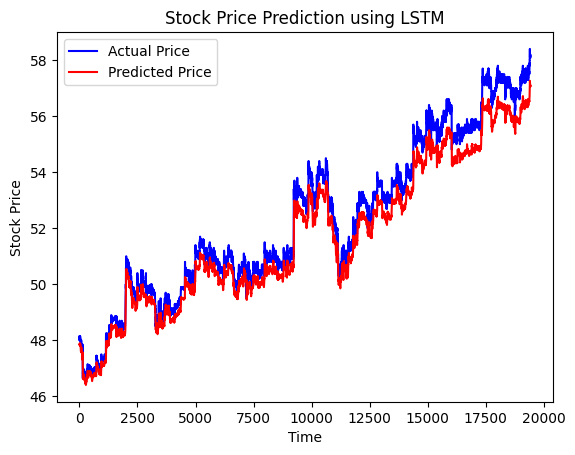

In [ ]:
# Dự đoán giá cổ phiếu trên tập kiểm tra
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Chuyển đổi ngược lại sang đơn vị gốc

# Chuyển đổi y_test sang đơn vị gốc
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Vẽ biểu đồ dự đoán so với thực tế
plt.plot(y_test_orig, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

